## Escuela Colombiana de Ingeniería Julio Garavito

### Programming for Data Analysis

### Midterm Exam

### Author

Juan Pablo Sánchez Bermúdez

<hr/>
    <div class="alert alert-success alertsuccess" style="margin-top: 20px">
        <h4> Before start </h4>
        <p>Install the following libraries if you have not installed these libraries.</p>
        <p><code>!pip install pandas</code></p>
        <p><code>!pip install matplotlib</code></p>
        <p><code>!pip install numpy</code></p>
        <p><code>!pip install seaburn</code></p>
    </div>
<hr/>

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

##### Due I couldn't connect to the database, I will load the dataframe from the file titanic.csv

# Loading the data set

In [2]:
path = 'titanic.csv'
df = pd.read_csv(path)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Missing values and percentage

The following function shows each column and the percentage of the missing values.

In [3]:
def missingValues(df):
    size = df.shape
    rows = size[0]
    columns = size[1]
    names = df.columns
    print("Column and Percentage")
    for column in range(columns):
        count = 0
        for row in range(rows):
            if str(df.iloc[row, column]) == "nan":
                count += 1
        print(names[column], str((count/rows)*100) + "%")

In [4]:
missingValues(df)

Column and Percentage
PassengerId 0.0%
Survived 0.0%
Pclass 0.0%
Name 0.0%
Sex 0.0%
Age 19.865319865319865%
SibSp 0.0%
Parch 0.0%
Ticket 0.0%
Fare 0.0%
Cabin 77.10437710437711%
Embarked 0.22446689113355783%


# Imputing missing values with the mode method

The following function fills the NA values of the dataframe with the column's mode.

In [5]:
def fillNa(df):
    newdf = df.copy()
    columnNames = newdf.columns
    for name in columnNames:
        newdf[name].fillna(newdf[name].mode()[0], inplace=True)
    return newdf

In [6]:
newdf = fillNa(df)
missingValues(newdf)

Column and Percentage
PassengerId 0.0%
Survived 0.0%
Pclass 0.0%
Name 0.0%
Sex 0.0%
Age 0.0%
SibSp 0.0%
Parch 0.0%
Ticket 0.0%
Fare 0.0%
Cabin 0.0%
Embarked 0.0%


# Manipulating the Embarked column

The function bellow replaces in the Embarked column the city the people embarked from.

S &rarr; Southampton

C &rarr; Cherburgo

Q &rarr; Queenstown

In [7]:
def changeEmbarked(df):
    df['Embarked'] = np.where((df.Embarked == 'S'), "Southampton", df.Embarked)
    df['Embarked'] = np.where((df.Embarked == 'C'), "Cherburgo", df.Embarked)
    df['Embarked'] = np.where((df.Embarked == 'Q'), "Queenstown", df.Embarked)

In [8]:
changeEmbarked(newdf)
newdf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherburgo
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,Southampton


# REtario column

The following function creates a new column acording to the age.

In [9]:
def retarioColumn(df):
    retario = pd.Series([])
    size = df.shape
    rows = size[0]
    for row in range(rows):
        if (0 <= df['Age'][row]) and (df['Age'][row] <= 5):
            retario[row] = "EarlyChildhood"
        elif (6 <= df['Age'][row]) and (df['Age'][row] <= 11):
            retario[row] = "Childhood"
        elif (12 <= df['Age'][row]) and (df['Age'][row] <= 13):
            retario[row] = "Adolescence"
        elif (14 <= df['Age'][row]) and (df['Age'][row] <= 26):
            retario[row] = "Youth"
        elif (27 <= df['Age'][row]) and (df['Age'][row] <= 59):
            retario[row] = "Adulthood"
        else:
            retario[row] = "Senescence"
    df.insert(12, "REtario", retario)

In [10]:
retarioColumn(newdf)
newdf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,REtario
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,Southampton,Youth
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherburgo,Adulthood
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,Southampton,Youth
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton,Adulthood
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,Southampton,Adulthood


# EDA

**Fare and surviced**

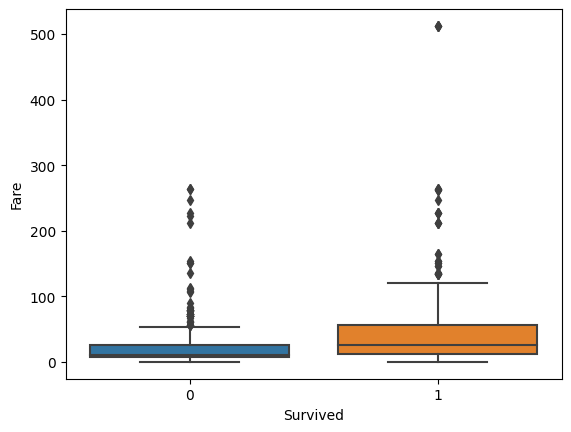

In [11]:
sns.boxplot(y=newdf["Fare"], x=newdf["Survived"]);
plt.show()

**Embarked and Survived**

The people that embarked in the port the Southampton had more chance to survive.

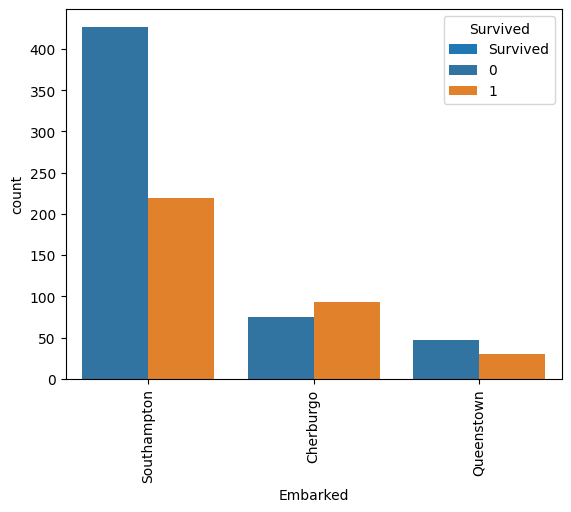

In [12]:
newdf[['Embarked','Survived']].groupby(['Embarked']).mean().plot.bar()
sns.countplot(x='Embarked',hue='Survived',data=newdf)
plt.show()

**Three variables and survived**

The following matrix shows how the ticket class, age and fare are correlated to who survived.

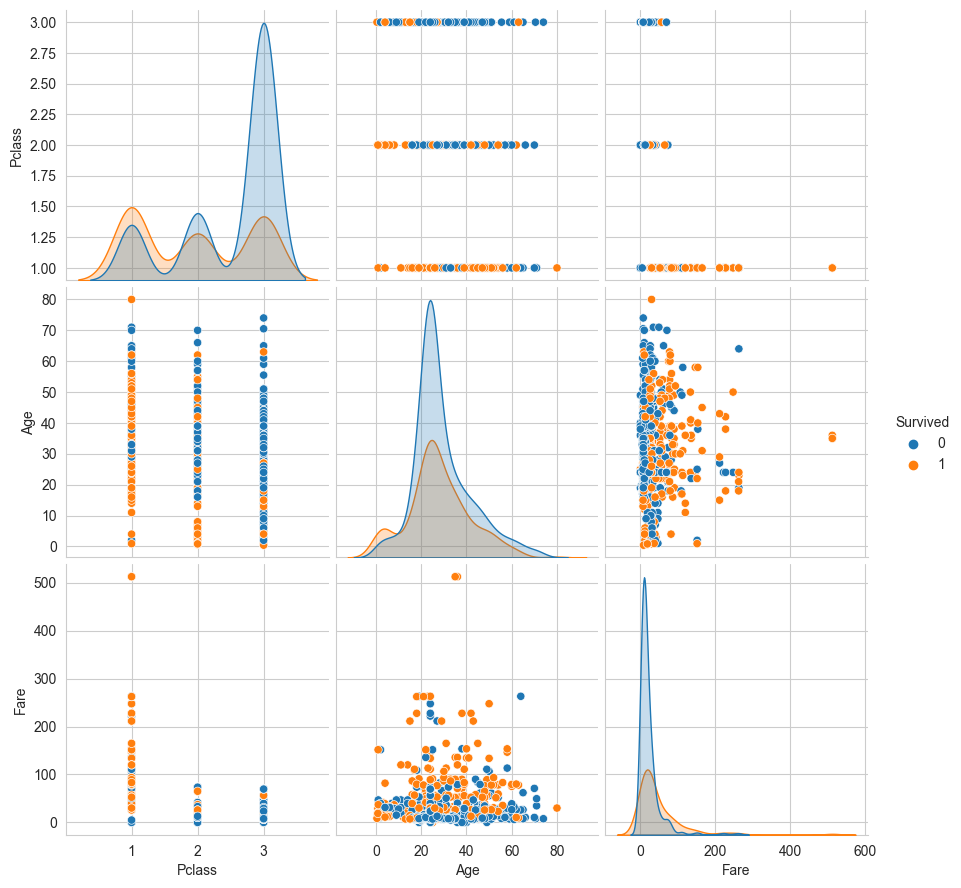

In [13]:
selFeat = ['Survived','Pclass','Age','Fare']
sns.set_style("whitegrid")
sns.pairplot(newdf[selFeat],hue="Survived",size=3)
plt.show()